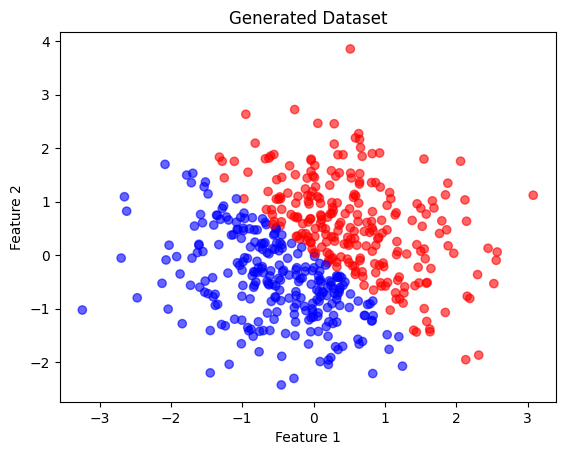

Test Accuracy: 92.00%


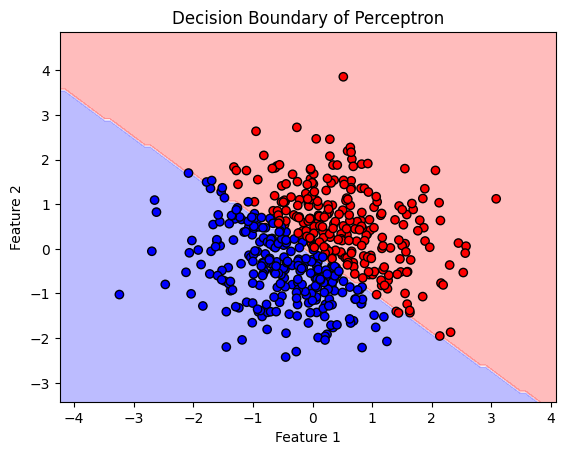

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Generate a synthetic dataset
np.random.seed(42)
num_samples = 500
X = np.random.randn(num_samples, 2)  # Two features
Y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Binary labels (0 or 1)

# Step 2: Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Dataset")
plt.show()

# Step 3: Split into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Implementing Perceptron Class
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, Y):
        num_features = X.shape[1]
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = self.activation(linear_output)
                error = Y[i] - prediction

                # Weight and bias update
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    def predict(self, X):
        return np.array([self.activation(np.dot(x, self.weights) + self.bias) for x in X])

# Step 5: Train the perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X_train, Y_train)

# Step 6: Evaluate the perceptron
Y_pred = perceptron.predict(X_test)
accuracy = np.mean(Y_pred == Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 7: Plot decision boundary
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary of Perceptron")
    plt.show()

plot_decision_boundary(perceptron, X, Y)